# Ejercicio

 - Importa el fichero fifa_limpio.csv

 - Usando el código de abajo podrás crear una nueva variable llamada posición que te será útil en los análisis posteriores

 - Imagina que eres contratado por el presidente de tu equipo de fútbol favorito y te pide un análisis exahustivo de los jugadores que existen a nivel internacional para fichar para la nueva temporada. Usando los datos de fifa_limpio y con las técnicas de análisis descriptivo vistas en clase (gráficos, y tablas groupby y pivot_table) **realiza un informe** que dé una visión global de qué tipo de jugadores hay disponibles para fichar.

 - Haz análisis por posición, los que sean más valorados, que tengan más o menos habilidades técnicas (variables como Skills, Attacking, Penalty, OVA...). Trata de averiguar si los jugadores con más calidad (OVA) son los mejor valorados economicamente (Value2)

 - No esperes que este enunciado te explique concretamente qué variables analizar y cómo, tienes que inspeccionar todas las que puedas y extraer aquellas visualizaciones que te aporten más información para tu informe.

 - Con informe quiero decir que de todas las visualizaciones que hayas desarrollado selecciones las 4 ó 5 más interesantes y hagas un comentario indicando qué conocimiento extraes de ellas, en una o dos líneas.

 - Como recomendación crea una nueva variable llamada "Rentable" (Sí o No) y úsala en tus representaciones. Si un jugador es muy caro y es muy malo, no sería rentable ficharlo.

 - Entrega un notebook con esas 4 ó 5 gráficas y tablas con sus comentarios respectivos




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def change_position(x):
  try:
    if 'CB' in x  or 'LCB' in x or 'RCB' in x or 'LB' in x  or 'RB' in x:
      return 'Defensa'
    elif 'CM' in x or 'LDM' in x or 'LAM' in x or 'RDM' in x or 'RAM' in x or'CDM' in x or 'CAM' in x or 'LM'  in x or 'RM' in x:
      return 'Medio'
    elif 'ST' in x or 'CF' in x or 'LW' in x or 'RW' in x:
      return 'Delantero'
    elif 'GK' in x:
      return 'Portero'
    else:
      return x
  except:
    return x



In [3]:
#Importamos librerias
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
#Limpieza de datos
fifa = pd.read_csv('/content/drive/MyDrive/Basic Data Analytics/Data/fifa_limpio.csv',sep=',')
fifa['Posicion'] = fifa['BP'].apply(change_position)
fifa['Release Clause'] =fifa['Release Clause'].str.replace('€', '').str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
fifa['Value2']=fifa['Value'].str.replace('€', '').str.replace('K', 'e3').str.replace('M', 'e6').astype(float)

def convertir_a_cm(altura):
    pies, pulgadas = altura.split("'")
    pies = int(pies)
    pulgadas = int(pulgadas.replace('"', ''))
    altura_cm = pies * 30.48 + pulgadas * 2.54
    return altura_cm

fifa['Height'] = fifa['Height'].apply(convertir_a_cm)

def convertir_a_kg(peso_lbs):
    peso_lbs = int(peso_lbs.replace('lbs', '').strip())  # Eliminar 'lbs' y espacios
    peso_kg = peso_lbs * 0.45359237
    return peso_kg

fifa['Weight'] = fifa['Weight'].apply(convertir_a_kg)

top_paises = fifa['Nationality'].value_counts().head(10)  # Obtener los 10 principales países
fifa['Nationality'] = fifa['Nationality'].where(fifa['Nationality'].isin(top_paises.index), 'Otros')

In [5]:
#Busqueda de jugadores que no estan en ningun contrato o que su contrato termina este año
import re
from datetime import datetime

# Función para extraer fechas de un texto
def extraer_fechas(texto):
    anos = re.findall(r'\b\d{4}\b', texto)
    if anos:
        if len(list(map(int, anos)))==1:
          return None, list(map(int, anos))[0]
        else:
          return  list(map(int, anos))
    else:
        return None, None

# Aplicar la función para extraer fechas y crear nuevas columnas 'inicio_contrato' y 'fin_contrato'
fifa['inicio_contrato'], fifa['fin_contrato'] = zip(*fifa['Contract'].apply(extraer_fechas))
# Obtener la fecha actual
fecha_actual = datetime.now().year

# Determinar jugadores disponibles
jugadores_disponibles = fifa[
    ((fifa['fin_contrato'].fillna(fecha_actual).astype(int) <= fecha_actual)) |
    ((fifa['inicio_contrato'].isnull()) & (fifa['fin_contrato'].isnull()))]

# Imprimir jugadores disponibles
print("Jugadores disponibles:")
jugadores_disponibles.head(5)

Jugadores disponibles:


,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,BP2,Value2,Value_ind,Value3,Wage2,Wage_ind,Wage3,Posicion,inicio_contrato,fin_contrato
0,1954,184383,A. Pasche,26,Otros,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.26,...,CENTRO,525000.0,1.0,525.0,4,1.0,4.0,Medio,2015.0,2020.0
1,2225,188044,Alan Carvalho,30,Otros,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.88,...,DELANTERO,8500000.0,100000.0,8500000.0,23,1.0,23.0,Delantero,NaN,2020.0
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.56,...,CAM,9000000.0,100000.0,900000.0,49,1.0,49.0,Medio,2019.0,2022.0
3,9815,233796,J. Evans,22,Otros,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.80,...,CENTRO,275000.0,1.0,275.0,4,1.0,4.0,Medio,2016.0,2021.0
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.34,...,CENTRO,725000.0,1.0,725.0,2,1.0,2.0,Medio,2018.0,2021.0


Text(0, 0.5, 'Valor')

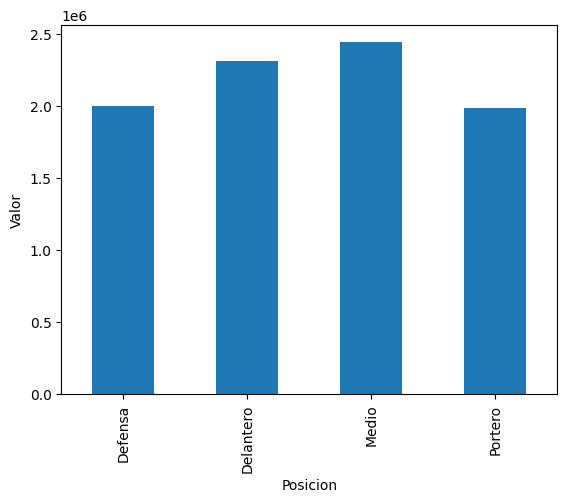

In [6]:
import matplotlib.pyplot as plt

# Calculamos la media de el valor de los jugadores en funcion de su posicion y creamos un gráfico de barras para visualizarlo
ax = jugadores_disponibles.groupby('Posicion')['Value2'].mean().plot(kind='bar')

# Establecemos las etiquetas de los ejes x y y
ax.set_xlabel('Posicion')
ax.set_ylabel('Valor')

<Axes: xlabel='OVA', ylabel='Value2'>

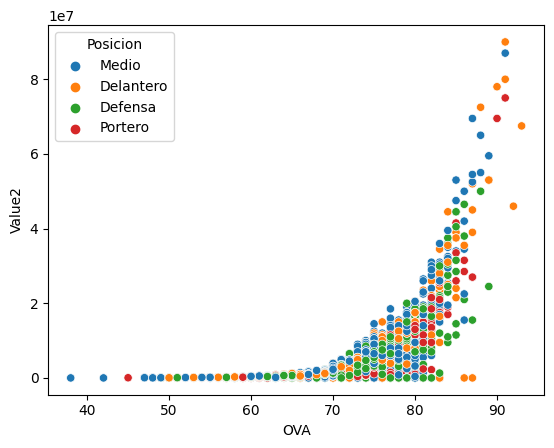

In [7]:
# Creamos un gráfico de dispersión(Este tipo de gráfico es especialmente útil cuando queremos visualizar
# la relación entre dos variables para determinar si existe alguna correlación o patrón entre ellas)
# con la calidad en el eje x, valor en el eje y y coloreamos los puntos por la Posicion del jugador

sns.scatterplot(x="OVA", y="Value2", hue="Posicion", data=jugadores_disponibles)

In [8]:
#La correlación es positiva es decir cuando calidad aumenta valor tiende a subir

In [9]:
dtf_filtrado = jugadores_disponibles[jugadores_disponibles['OVA'] > 80]
dtf_filtrado = dtf_filtrado[dtf_filtrado['OVA'] < 90]
dtf_filtrado

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,BP2,Value2,Value_ind,Value3,Wage2,Wage_ind,Wage3,Posicion,inicio_contrato,fin_contrato
50,3589,199845,F. Acerbi,32,Italy,Lazio,CB,CB,Lazio 2018 ~ 2023,193.04,...,DEFENSA,16500000.0,100000.0,16500000.0,75,1.0,75.0,Defensa,2018.0,2023.0
102,170,31432,D. Drogba,38,Otros,NaN,ST,ST,Ivory Coast Free,187.96,...,DELANTERO,0.0,1.0,0.0,0,1.0,0.0,Delantero,NaN,NaN
116,4449,204884,B. Mendy,25,France,Manchester City,LWB,LB,Manchester City 2017 ~ 2022,185.42,...,DELANTERO,19500000.0,100000.0,19500000.0,115,1.0,115.0,Delantero,2017.0,2022.0
252,4618,205849,E. Andrada,29,Argentina,Argentina,GK,GK,Boca Juniors 2018 ~ 2022,193.04,...,PORTERO,14500000.0,100000.0,14500000.0,19,1.0,19.0,Portero,2018.0,2022.0
257,9052,230621,G. Donnarumma,21,Italy,Milan,GK,GK,Milan 2015 ~ 2021,195.58,...,PORTERO,41500000.0,100000.0,41500000.0,34,1.0,34.0,Portero,2015.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,1895,183907,J. Boateng,31,Germany,FC Bayern München,CB,CB,FC Bayern München 2011 ~ 2021,193.04,...,DEFENSA,16500000.0,100000.0,16500000.0,82,1.0,82.0,Defensa,2011.0,2021.0
13446,569,146536,Jesús Navas,34,Spain,Sevilla FC,RB,RB RM,Sevilla FC 2017 ~ 2021,172.72,...,RB,11000000.0,100000.0,1100000.0,43,1.0,43.0,Defensa,2017.0,2021.0
13530,2385,189242,Coutinho,28,Brazil,FC Barcelona,CAM,CAM LW CM,FC Barcelona 2018 ~ 2023,172.72,...,CAM,26000000.0,100000.0,2600000.0,190,1.0,190.0,Medio,2018.0,2023.0
13575,7526,223952,David Soria,27,Spain,Getafe CF,GK,GK,Getafe CF 2018 ~ 2022,193.04,...,PORTERO,18500000.0,100000.0,18500000.0,30,1.0,30.0,Portero,2018.0,2022.0


In [10]:
# Creamos una tabla pivote con los valores medios de jugadores en funcion de 'Posicion' (índice) y 'Age'
#para visualizar en forma de tabla un resumen de grafica de la siguiente celda
df_pt = pd.pivot_table(jugadores_disponibles, values='Value2', index='Posicion', columns='Age', aggfunc='mean')
df_pt

Age,16,17,18,19,20,21,22,23,24,25,...,34,35,36,37,38,39,40,41,42,43
Posicion,,,,,,,,,,,,,,,,,,,,,
Defensa,133571.428571,224901.960784,294608.695652,433974.358974,1.108590e+06,1.019737e+06,1.320217e+06,1.510537e+06,2.373000e+06,3.066602e+06,...,1.425663e+06,1.277063e+06,509868.421053,4.457143e+05,1.758333e+05,1.521429e+05,0.0,NaN,0.0,NaN
Delantero,239000.000000,924673.913043,408651.685393,642624.113475,9.842416e+05,9.211207e+05,1.800594e+06,1.885073e+06,2.316491e+06,2.377892e+06,...,1.796458e+06,2.818553e+06,659782.608696,1.205455e+06,1.388929e+06,1.075000e+06,0.0,0.0,NaN,NaN
Medio,287187.500000,565977.011494,572914.285714,699111.498258,1.395427e+06,1.702239e+06,2.136746e+06,2.312141e+06,2.892189e+06,2.999954e+06,...,2.104160e+06,1.420278e+06,929142.857143,7.947368e+05,8.952632e+05,1.566429e+05,0.0,0.0,0.0,NaN
Portero,122500.000000,119375.000000,231521.739130,311031.746032,5.411806e+05,1.493810e+06,1.062500e+06,1.262961e+06,2.289028e+06,2.424250e+06,...,1.941111e+06,7.103226e+05,650781.250000,2.695714e+05,2.436842e+05,2.783333e+05,149375.0,123750.0,588000.0,45000.0


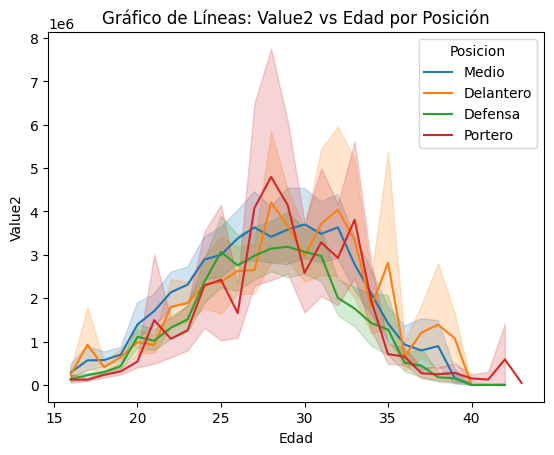

In [11]:
# Creamos un gráfico de líneas para visualizar relacion entre edad y valor
sns.lineplot(data=jugadores_disponibles, x="Age", y="Value2", hue="Posicion")

# Establecer etiquetas y título del gráfico
plt.xlabel('Edad')
plt.ylabel('Value2')
plt.title('Gráfico de Líneas: Value2 vs Edad por Posición')
plt.show()

In [12]:
#Como vemos en general los jugadores mejor valorados tienen entre 25 y 35 años

In [13]:
dtf_filtrado = dtf_filtrado[dtf_filtrado['Age'] > 25]
dtf_filtrado = dtf_filtrado[dtf_filtrado['Age'] < 35]
dtf_filtrado

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,BP2,Value2,Value_ind,Value3,Wage2,Wage_ind,Wage3,Posicion,inicio_contrato,fin_contrato
50,3589,199845,F. Acerbi,32,Italy,Lazio,CB,CB,Lazio 2018 ~ 2023,193.04,...,DEFENSA,16500000.0,100000.0,16500000.0,75,1.0,75.0,Defensa,2018.0,2023.0
252,4618,205849,E. Andrada,29,Argentina,Argentina,GK,GK,Boca Juniors 2018 ~ 2022,193.04,...,PORTERO,14500000.0,100000.0,14500000.0,19,1.0,19.0,Portero,2018.0,2022.0
293,2312,188803,Taison,32,Brazil,Shakhtar Donetsk,LM,LM CAM,Shakhtar Donetsk 2013 ~ 2021,172.72,...,LM,14000000.0,100000.0,1400000.0,500,1.0,500.0,Medio,2013.0,2021.0
422,1483,177683,Y. Sommer,31,Otros,Borussia Mönchengladbach,GK,GK,Borussia Mönchengladbach 2014 ~ 2023,182.88,...,PORTERO,28500000.0,100000.0,28500000.0,55,1.0,55.0,Portero,2014.0,2023.0
596,538,143076,A. Gómez,32,Argentina,Atalanta,CAM,CAM CF ST,Atalanta 2014 ~ 2022,167.64,...,CAM,34500000.0,100000.0,34500000.0,100,1.0,100.0,Medio,2014.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,1895,183907,J. Boateng,31,Germany,FC Bayern München,CB,CB,FC Bayern München 2011 ~ 2021,193.04,...,DEFENSA,16500000.0,100000.0,16500000.0,82,1.0,82.0,Defensa,2011.0,2021.0
13446,569,146536,Jesús Navas,34,Spain,Sevilla FC,RB,RB RM,Sevilla FC 2017 ~ 2021,172.72,...,RB,11000000.0,100000.0,1100000.0,43,1.0,43.0,Defensa,2017.0,2021.0
13530,2385,189242,Coutinho,28,Brazil,FC Barcelona,CAM,CAM LW CM,FC Barcelona 2018 ~ 2023,172.72,...,CAM,26000000.0,100000.0,2600000.0,190,1.0,190.0,Medio,2018.0,2023.0
13575,7526,223952,David Soria,27,Spain,Getafe CF,GK,GK,Getafe CF 2018 ~ 2022,193.04,...,PORTERO,18500000.0,100000.0,18500000.0,30,1.0,30.0,Portero,2018.0,2022.0


In [14]:
#Creamos una tabla pivote con los valores medios de jugadores en funcion de 'Posicion' (índice) de cada 'Nationality'
#para crear la grafica de la siguiente celda
df_pt = pd.pivot_table(jugadores_disponibles, values = 'Value2', index = 'Posicion', columns = 'Nationality', aggfunc = 'mean')
df_pt

Nationality,Argentina,Brazil,England,France,Germany,Italy,Netherlands,Otros,Portugal,Spain,United States
Posicion,,,,,,,,,,,
Defensa,2.428345e+06,4.451316e+06,1.217952e+06,2.965242e+06,1.846912e+06,2.700087e+06,2.339391e+06,1.589329e+06,3.022770e+06,3.245108e+06,9.582857e+05
Delantero,4.235746e+06,4.903000e+06,1.284836e+06,2.656007e+06,1.434540e+06,3.006167e+06,2.018043e+06,1.959890e+06,3.957982e+06,3.353566e+06,1.020882e+06
Medio,3.534320e+06,5.017478e+06,1.465839e+06,2.750785e+06,2.858351e+06,2.324470e+06,2.347664e+06,2.081125e+06,4.123851e+06,3.413852e+06,1.126480e+06
Portero,3.068571e+06,3.166667e+06,9.022768e+05,2.374545e+06,2.504490e+06,3.290204e+06,1.459000e+06,1.644368e+06,5.520000e+06,2.878068e+06,7.476316e+05


Text(0, 0.5, 'Valor medio')

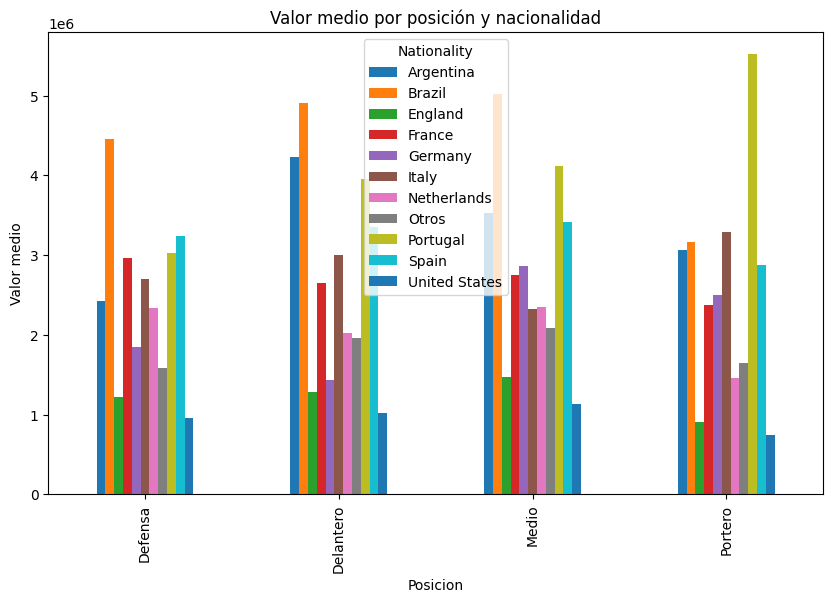

In [15]:
#Creamos un gráfico de barras a partir de la tabla pivote anterior
ax2 = df_pt.plot.bar(title='Valor medio por posición y nacionalidad', figsize=(10, 6))
#Establecemos etiqueta para eje y
ax2.set_ylabel('Valor medio')

In [16]:
#Podemos ver que brasil argentina españa e italia (en ese orden) son en general los jugadores mejor valorados

In [17]:
dtf_filtrado = dtf_filtrado[dtf_filtrado['Nationality'].isin(['Spain', 'Argentina', 'Brazil', 'Italy'])]
dtf_filtrado

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,BP2,Value2,Value_ind,Value3,Wage2,Wage_ind,Wage3,Posicion,inicio_contrato,fin_contrato
50,3589,199845,F. Acerbi,32,Italy,Lazio,CB,CB,Lazio 2018 ~ 2023,193.04,...,DEFENSA,16500000.0,100000.0,16500000.0,75,1.0,75.0,Defensa,2018.0,2023.0
252,4618,205849,E. Andrada,29,Argentina,Argentina,GK,GK,Boca Juniors 2018 ~ 2022,193.04,...,PORTERO,14500000.0,100000.0,14500000.0,19,1.0,19.0,Portero,2018.0,2022.0
293,2312,188803,Taison,32,Brazil,Shakhtar Donetsk,LM,LM CAM,Shakhtar Donetsk 2013 ~ 2021,172.72,...,LM,14000000.0,100000.0,1400000.0,500,1.0,500.0,Medio,2013.0,2021.0
596,538,143076,A. Gómez,32,Argentina,Atalanta,CAM,CAM CF ST,Atalanta 2014 ~ 2022,167.64,...,CAM,34500000.0,100000.0,34500000.0,100,1.0,100.0,Medio,2014.0,2022.0
606,3251,197781,Isco,28,Spain,Real Madrid,CAM,CAM CM LW,Real Madrid 2013 ~ 2022,175.26,...,CAM,31500000.0,100000.0,31500000.0,210,1.0,210.0,Medio,2013.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12885,2674,191043,Alex Sandro,29,Brazil,Juventus,LB,LB LM,Juventus 2015 ~ 2023,180.34,...,LB,31500000.0,100000.0,31500000.0,120,1.0,120.0,Defensa,2015.0,2023.0
12979,3530,199575,Jordi Masip,31,Spain,Real Valladolid CF,GK,GK,Real Valladolid CF 2017 ~ 2022,180.34,...,PORTERO,11500000.0,100000.0,11500000.0,21,1.0,21.0,Portero,2017.0,2022.0
13446,569,146536,Jesús Navas,34,Spain,Sevilla FC,RB,RB RM,Sevilla FC 2017 ~ 2021,172.72,...,RB,11000000.0,100000.0,1100000.0,43,1.0,43.0,Defensa,2017.0,2021.0
13530,2385,189242,Coutinho,28,Brazil,FC Barcelona,CAM,CAM LW CM,FC Barcelona 2018 ~ 2023,172.72,...,CAM,26000000.0,100000.0,2600000.0,190,1.0,190.0,Medio,2018.0,2023.0


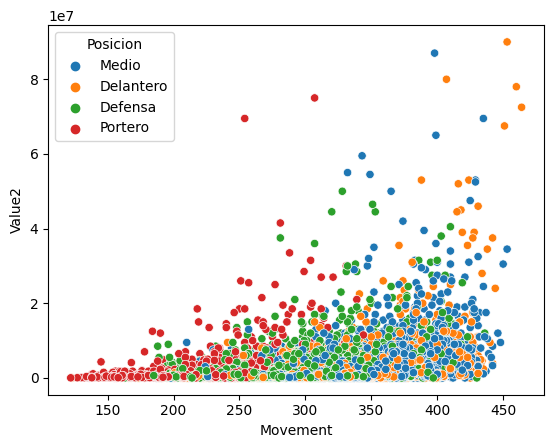

In [18]:
#Creamos un gráfico de dispersión entre 'movement' y el valor de jugadores_disponibles para ver relacion entre varibles
sns.scatterplot(x="Movement", y="Value2", hue="Posicion" , data=jugadores_disponibles);

In [19]:
#La correlación es positiva es decir cuando aumenta el valor de jugadores , 'Movement' tiende a subir

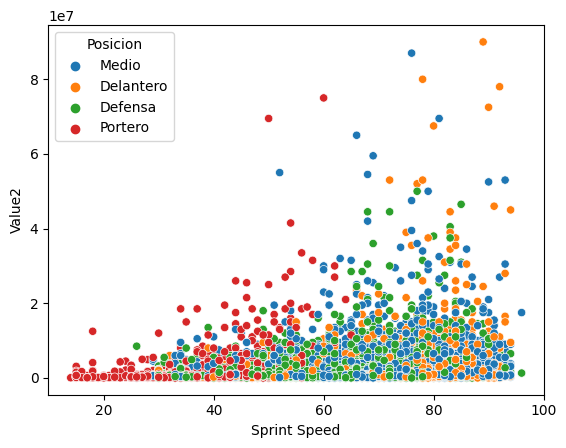

In [20]:
#Creamos un gráfico de dispersión entre velocidad y el valor de jugadores_disponibles para ver relacion entre varibles
sns.scatterplot(x="Sprint Speed", y="Value2", hue="Posicion" , data=jugadores_disponibles);

In [21]:
#La correlación es positiva es decir cuando aumenta el valor de jugadores , 'Sprint Speed' tiende a subir

In [22]:
dtf_por_movement = dtf_filtrado.sort_values(by='Movement', ascending=True)

# ordenar los jugadores por la columna 'Sprint Speed' de forma ascendente dentro del resultado anterior
dtf_por_speed = dtf_filtrado.sort_values(by='Sprint Speed', ascending=True)

dtf_por_movement

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,BP2,Value2,Value_ind,Value3,Wage2,Wage_ind,Wage3,Posicion,inicio_contrato,fin_contrato
252,4618,205849,E. Andrada,29,Argentina,Argentina,GK,GK,Boca Juniors 2018 ~ 2022,193.04,...,PORTERO,14500000.0,100000.0,14500000.0,19,1.0,19.0,Portero,2018.0,2022.0
7225,8864,230168,Raphaelito Anjos,32,Brazil,Grêmio,GK,GK,Grêmio 2019 ~ 2023,190.50,...,PORTERO,13500000.0,100000.0,13500000.0,32,1.0,32.0,Portero,2019.0,2023.0
7133,1473,177610,Javi Martínez,31,Spain,FC Bayern München,CB,CDM CB,FC Bayern München 2012 ~ 2021,193.04,...,DEFENSA,13500000.0,100000.0,13500000.0,76,1.0,76.0,Defensa,2012.0,2021.0
13575,7526,223952,David Soria,27,Spain,Getafe CF,GK,GK,Getafe CF 2018 ~ 2022,193.04,...,PORTERO,18500000.0,100000.0,18500000.0,30,1.0,30.0,Portero,2018.0,2022.0
3224,881,163489,A. Consigli,33,Italy,Sassuolo,GK,GK,Sassuolo 2014 ~ 2022,187.96,...,PORTERO,9500000.0,100000.0,9500000.0,32,1.0,32.0,Portero,2014.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,3930,201995,Felipe Anderson,27,Brazil,West Ham United,LM,LM CAM,West Ham United 2018 ~ 2022,175.26,...,LM,18500000.0,100000.0,18500000.0,53,1.0,53.0,Medio,2018.0,2022.0
293,2312,188803,Taison,32,Brazil,Shakhtar Donetsk,LM,LM CAM,Shakhtar Donetsk 2013 ~ 2021,172.72,...,LM,14000000.0,100000.0,1400000.0,500,1.0,500.0,Medio,2013.0,2021.0
4903,3329,198219,L. Insigne,29,Italy,Napoli,LW,LW CF,Napoli 2010 ~ 2022,162.56,...,DELANTERO,37500000.0,100000.0,37500000.0,120,1.0,120.0,Delantero,2010.0,2022.0
8470,2561,190483,Douglas Costa,29,Brazil,Juventus,LM,LM RW LW,Juventus 2018 ~ 2022,172.72,...,LM,30500000.0,100000.0,30500000.0,120,1.0,120.0,Medio,2018.0,2022.0


In [23]:
dtf_por_speed

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,BP2,Value2,Value_ind,Value3,Wage2,Wage_ind,Wage3,Posicion,inicio_contrato,fin_contrato
8620,192,45197,Xabi Alonso,34,Spain,FC Bayern München,CM,CDM CM,FC Bayern München 2014 ~ 2017,182.88,...,CENTRO,6000000.0,100000.0,600000.0,100,1.0,100.0,Medio,2014.0,2017.0
13575,7526,223952,David Soria,27,Spain,Getafe CF,GK,GK,Getafe CF 2018 ~ 2022,193.04,...,PORTERO,18500000.0,100000.0,18500000.0,30,1.0,30.0,Portero,2018.0,2022.0
3224,881,163489,A. Consigli,33,Italy,Sassuolo,GK,GK,Sassuolo 2014 ~ 2022,187.96,...,PORTERO,9500000.0,100000.0,9500000.0,32,1.0,32.0,Portero,2014.0,2022.0
7133,1473,177610,Javi Martínez,31,Spain,FC Bayern München,CB,CDM CB,FC Bayern München 2012 ~ 2021,193.04,...,DEFENSA,13500000.0,100000.0,13500000.0,76,1.0,76.0,Defensa,2012.0,2021.0
8165,5201,209960,Pacheco,28,Spain,Deportivo Alavés,GK,GK,Deportivo Alavés 2015 ~ 2023,185.42,...,PORTERO,19500000.0,100000.0,19500000.0,28,1.0,28.0,Portero,2015.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2018,185020,José Callejón,33,Spain,Napoli,RM,RM RW,Napoli 2013 ~ 2020,177.80,...,RM,19000000.0,100000.0,1900000.0,96,1.0,96.0,Medio,2013.0,2020.0
293,2312,188803,Taison,32,Brazil,Shakhtar Donetsk,LM,LM CAM,Shakhtar Donetsk 2013 ~ 2021,172.72,...,LM,14000000.0,100000.0,1400000.0,500,1.0,500.0,Medio,2013.0,2021.0
8470,2561,190483,Douglas Costa,29,Brazil,Juventus,LM,LM RW LW,Juventus 2018 ~ 2022,172.72,...,LM,30500000.0,100000.0,30500000.0,120,1.0,120.0,Medio,2018.0,2022.0
5965,402,135567,Nilmar,26,Brazil,Villarreal CF,ST,ST CF,Villarreal CF 2009 ~ 2014,180.34,...,DELANTERO,16500000.0,100000.0,16500000.0,90,1.0,90.0,Delantero,2009.0,2014.0
